## draw image

In [1]:
from matplotlib import pyplot as plt
import numpy as np

def draw_img(img):
    fig = plt.figure(figsize=(10, 5))
    gs = fig.add_gridspec(1, 2)

    # show in image axis
    ax = fig.add_subplot(gs[0, 0])
    ax.set_title(f"image axis")
    ax.imshow(img, cmap="gray")
    ax.set_xlim(-img.shape[1], img.shape[1])
    ax.set_ylim(img.shape[0], -img.shape[0])

    # show in x y axis
    ax = fig.add_subplot(gs[0, 1])
    ax.set_title(f"x y axis")
    ax.imshow(img, cmap="gray")
    ax.set_xlim(-img.shape[1], img.shape[1])
    ax.set_ylim(-img.shape[0], img.shape[0])

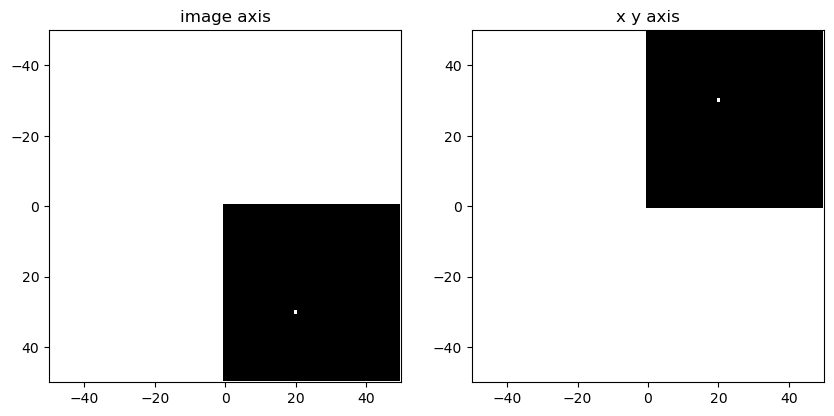

In [2]:
img = np.zeros((50, 50))

# point at (x, y)
point = (20, 30)
img[point[1]][point[0]] = 255
draw_img(img)

## draw step

In [3]:
def draw_item(ax, step, deg, point, img):
    # draw a green point
    ax.plot(point[0], point[1], 'o', color='g')

    # draw two gray lines as reference
    p_left = (-img.shape[1], point[1])
    p_rigth = (img.shape[1], point[1])
    ax.plot((p_left[0], p_rigth[0]), (p_left[1], p_rigth[1]), ':', color='gray')
    p_top = (point[0], img.shape[0])
    p_bottom = (point[0], -img.shape[0])
    ax.plot((p_top[0], p_bottom[0]), (p_top[1], p_bottom[1]), '-', color='gray')
    if step == "green-point": return

    # draw two red lines as angle
    red_deg = deg
    red_rad = red_deg * np.pi / 180
    red_w_left = point[0] - p_left[0]
    red_w_rigth = p_rigth[0] - point[0]
    red_h_left = - np.sin(red_rad) * red_w_left / np.cos(red_rad)
    red_h_rigth = np.sin(red_rad) * red_w_rigth / np.cos(red_rad)
    red_p_left = (-img.shape[1], red_h_left + point[1])
    red_p_rigth = (img.shape[1], red_h_rigth + point[1])
    ax.plot((red_p_left[0], red_p_rigth[0]), (red_p_left[1], red_p_rigth[1]), ':', color='r')
    
    red2_deg = red_deg + 90 if red_deg < 90 else red_deg - 90
    red2_rad = red2_deg * np.pi / 180
    red2_w_left = point[0] - p_left[0]
    red2_w_rigth = p_rigth[0] - point[0]
    red2_h_left = - np.sin(red2_rad) * red2_w_left / np.cos(red2_rad)
    red2_h_rigth = np.sin(red2_rad) * red2_w_rigth / np.cos(red2_rad)
    red2_p_left = (-img.shape[1], red2_h_left + point[1])
    red2_p_rigth = (img.shape[1], red2_h_rigth + point[1])
    ax.plot((red2_p_left[0], red2_p_rigth[0]), (red2_p_left[1], red2_p_rigth[1]), '-', color='r')

    ax.plot(point[0], point[1], marker=r'$\circlearrowleft$', ms=50, color='r')
    if step == "red-line": return
    

    # draw a blue circle as distance
    x = point[0]
    y = point[1]
    r = x * np.cos(red_rad) + y * np.sin(red_rad)
    distance = r
    circle = plt.Circle((0, 0), distance, fill=False, color='b', linestyle=':')
    ax.add_artist(circle)

    # draw a blue line as distance
    r = x * np.cos(red_rad) + y * np.sin(red_rad)
    blue_h = np.sin(red_rad) * r
    blue_w = np.cos(red_rad) * r
    blue_p = (blue_w, blue_h)
    ax.plot((0, blue_p[0]), (0, blue_p[1]), '-', color='b')
    if step == "blue-line": return

def draw_step(img, point):
    # define the steps in each row
    steps = ["green-point", "red-line", "blue-line"]
    # define the degrees in each rol
    degs = [0, 30, 55, 90, 105, 140, 170]

    fig = plt.figure(figsize=(5 * len(steps), 5 * len(degs)))
    fig.suptitle(f"step by step")
    gs = fig.add_gridspec(len(degs), len(steps))
    for row, deg in enumerate(degs):
        for col, step in enumerate(steps):
            ax = fig.add_subplot(gs[row, col])
            ax.set_title(f"step: {step}, degree: {deg}")
            ax.imshow(img, cmap="gray")
            ax.set_xlim(-img.shape[1], img.shape[1])
            ax.set_ylim(-img.shape[0], img.shape[0])

            draw_item(ax, step, deg, point, img)

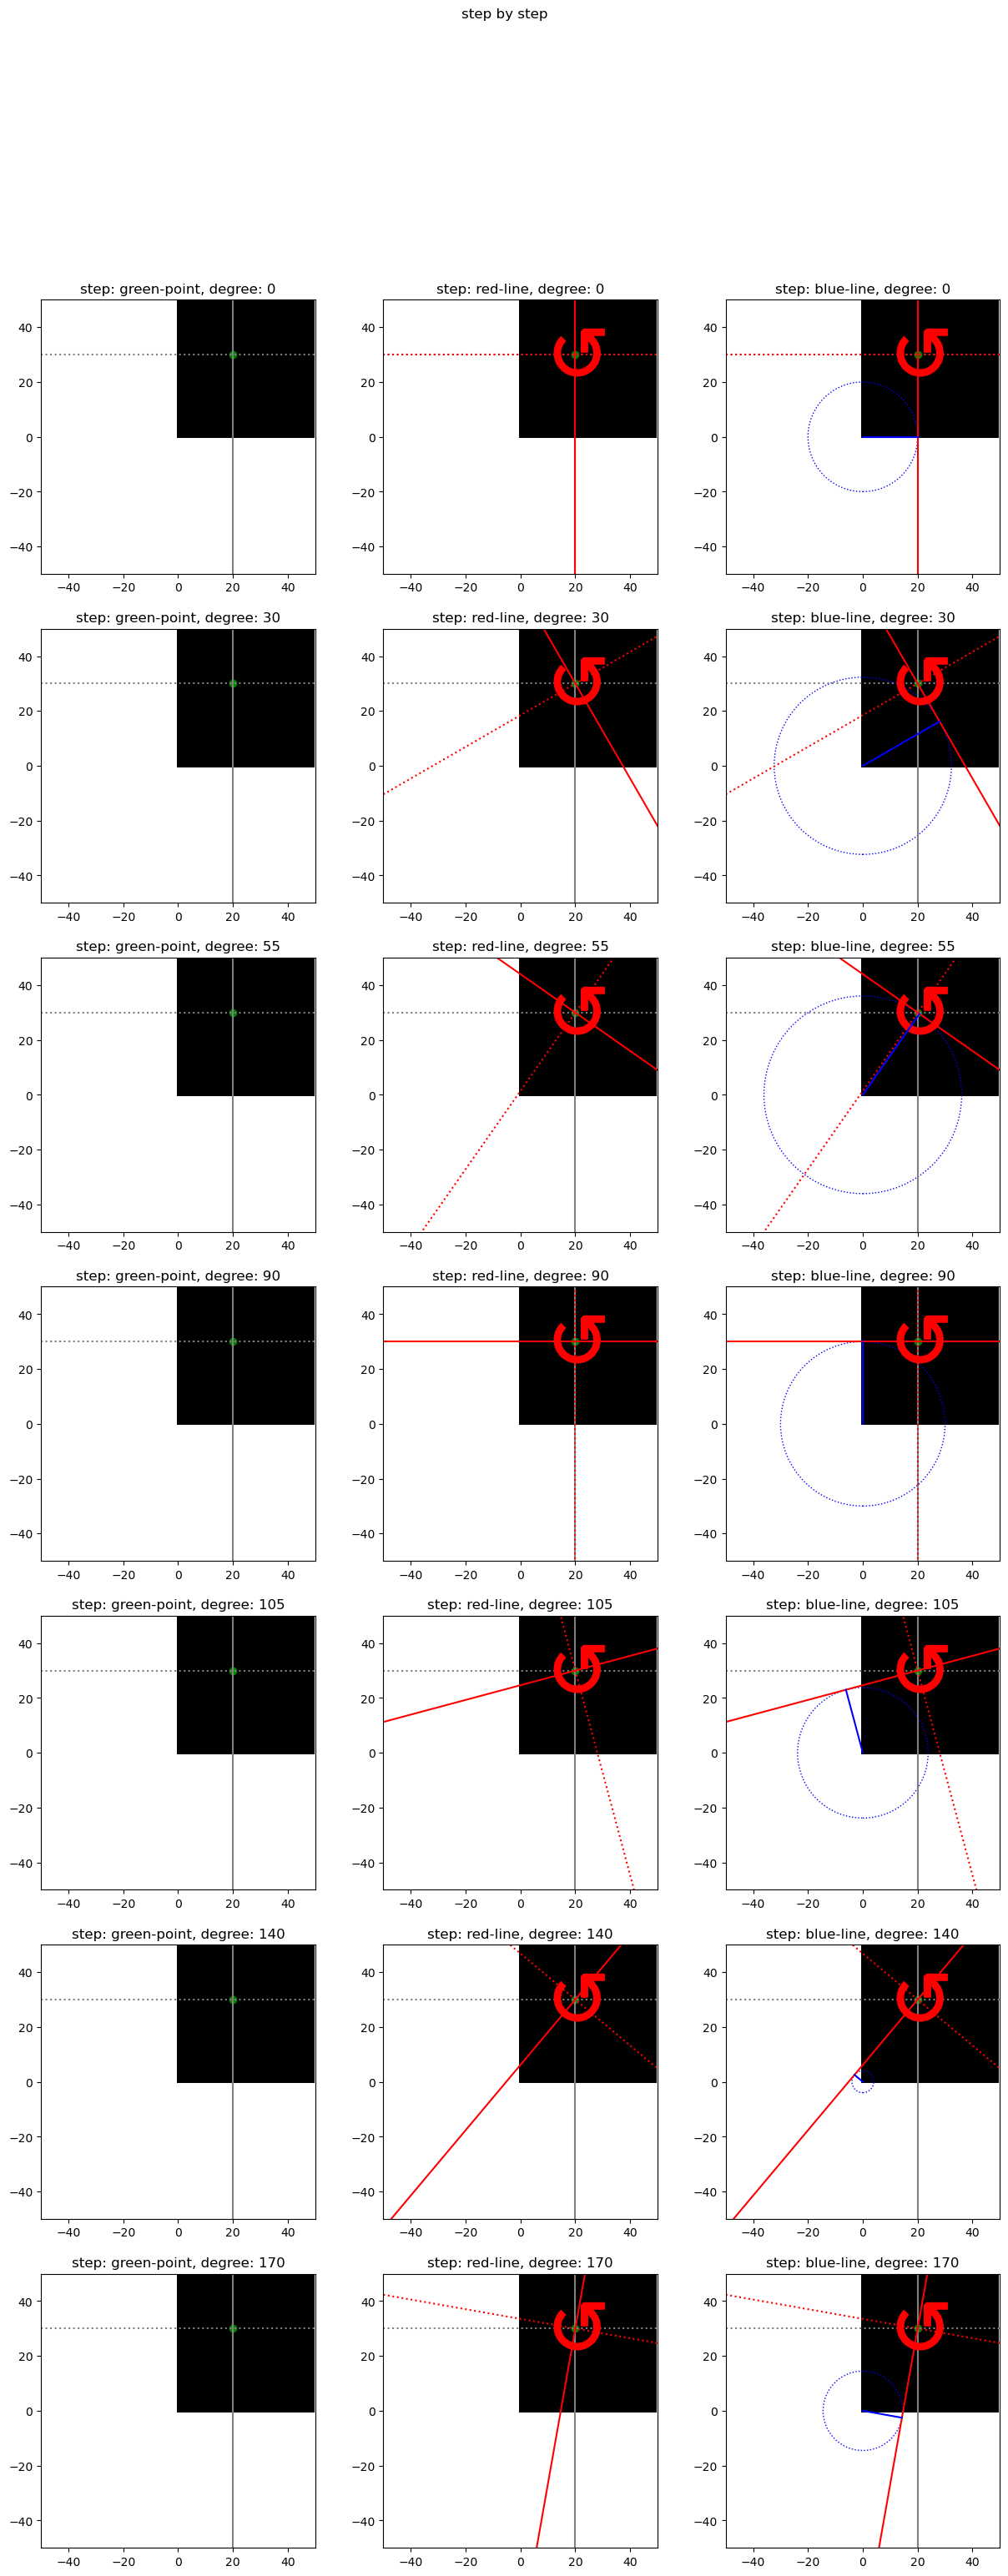

In [4]:
img = np.zeros((50, 50))

# point at (x, y)
point = (20, 30)
draw_step(img, point)

## draw hough

In [5]:
from skimage.transform import hough_line

def draw_hough(img):
    fig = plt.figure(figsize=(20, 5))
    gs = fig.add_gridspec(1, 3)

    # draw img
    ax = fig.add_subplot(gs[0, 0])
    ax.set_title(f"x y")
    ax.set_xlim(0, img.shape[1])
    ax.set_ylim(0, img.shape[0])
    ax.imshow(img, cmap="gray")

    # draw img
    ax = fig.add_subplot(gs[0, 1])
    ax.set_title(f"img")
    ax.imshow(img, cmap="gray")
    ax.axvline(25, color='r')
    ax.spines['bottom'].set_color('blue')
    ax.xaxis.label.set_color('blue')
    ax.plot(25, 25, marker=r'$\circlearrowright$', ms=50, color='r')

    # get hough line space of 0-180 degrees
    tested_angles = np.deg2rad(np.arange(0.1, 180.0))
    h, _, _ = hough_line(img, theta=tested_angles)

    # draw hough space
    ax = fig.add_subplot(gs[0, 2])
    ax.set_title(f"hough")
    ax.set_xlabel("degrees")
    ax.set_ylabel("distance")
    ax.spines['left'].set_color('blue')
    ax.yaxis.label.set_color('blue')
    ax.spines['bottom'].set_color('red')
    ax.xaxis.label.set_color('red')
    ax.imshow(np.flip(h, axis=0), cmap="gray", aspect='auto', extent=[0, 180, - h.shape[0] / 2, h.shape[0] / 2])

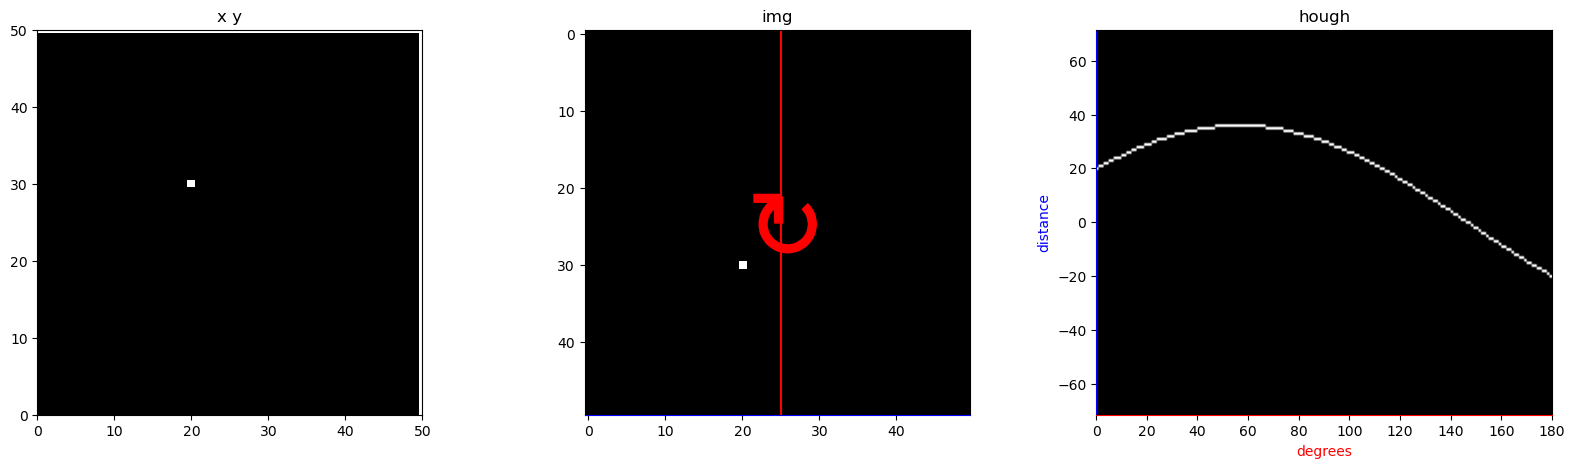

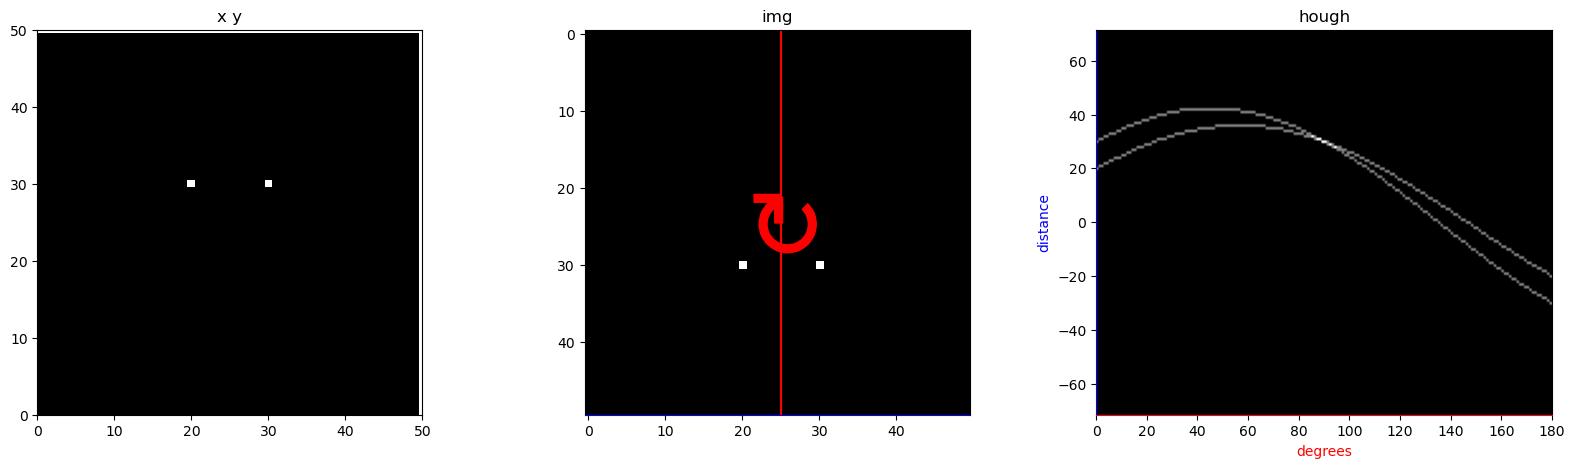

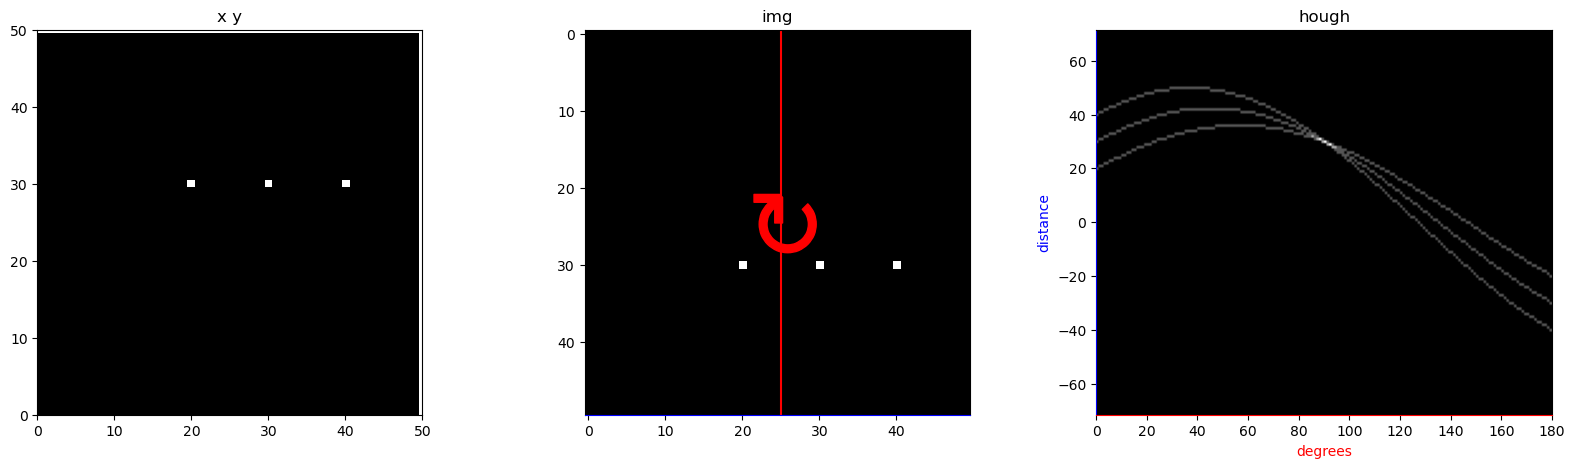

In [6]:
# image with empty
img = np.zeros((50, 50))

# image with one point
img[30][20] = 255
draw_hough(img)

# image with two points
img[30][30] = 255
draw_hough(img)

# image with three points
img[30][40] = 255
draw_hough(img)

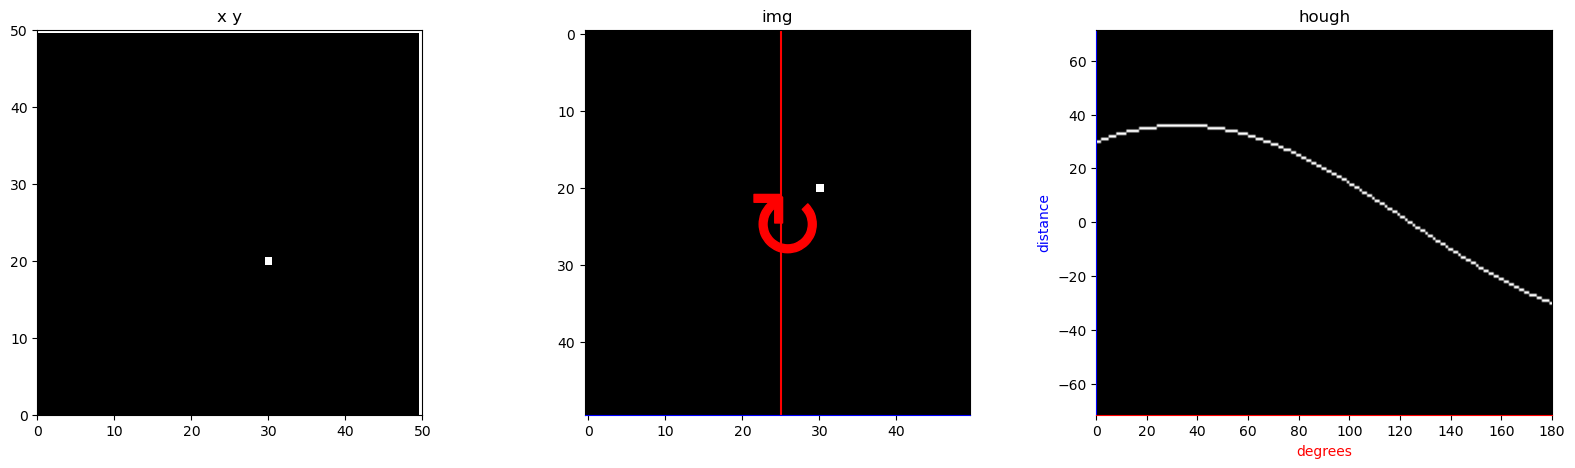

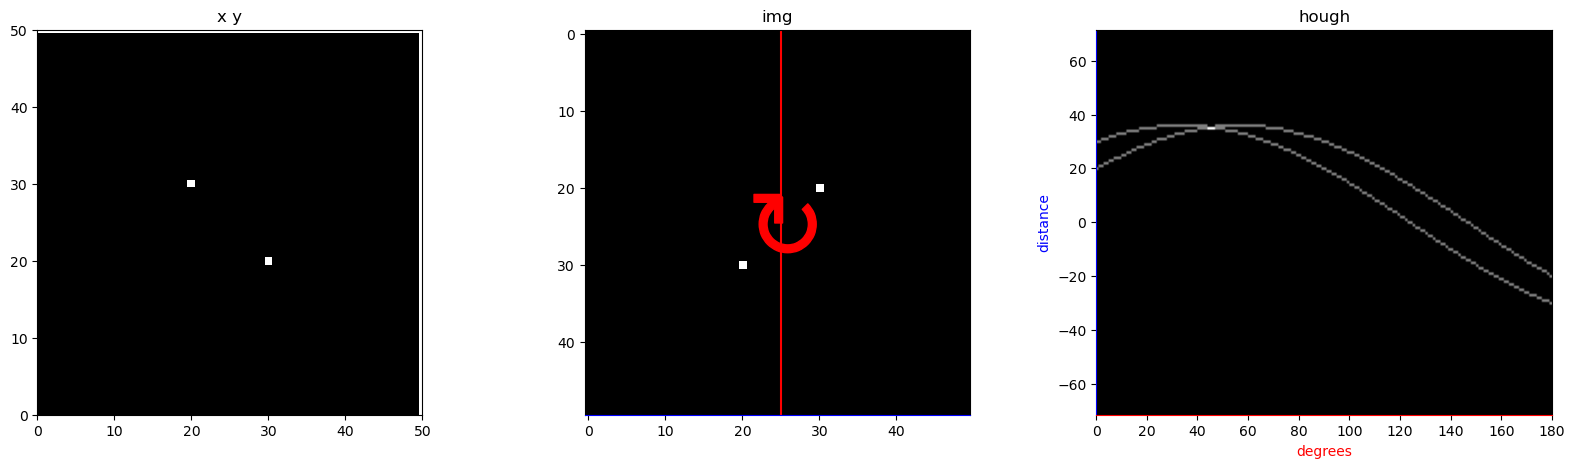

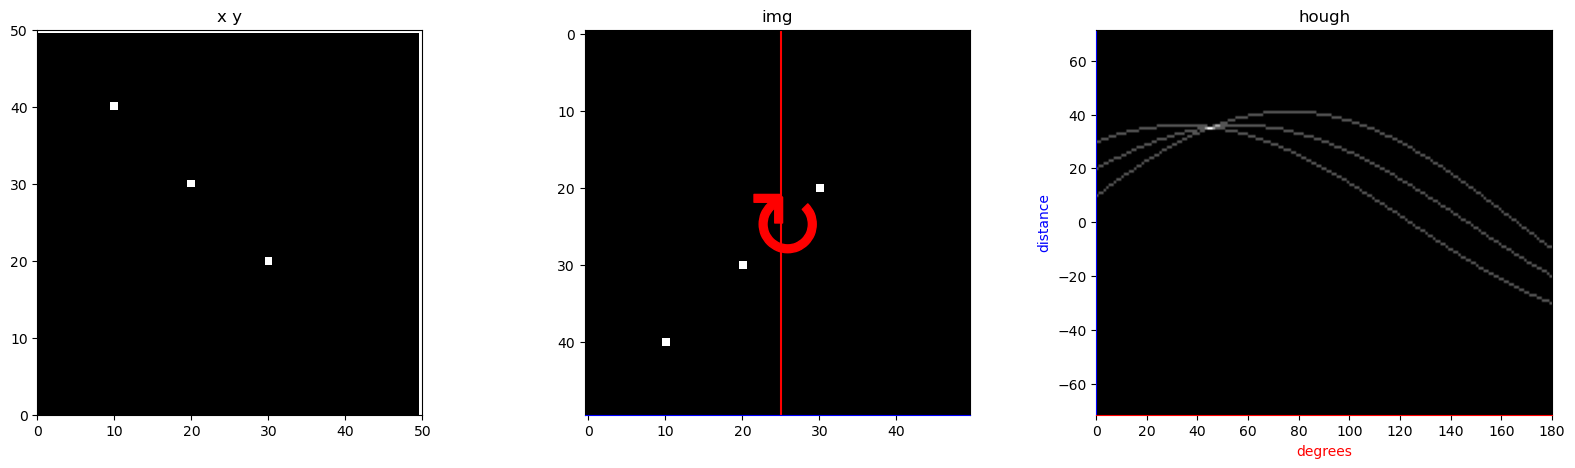

In [7]:
# image with empty
img = np.zeros((50, 50))

# image with one point
img[20][30] = 255
draw_hough(img)

# image with two points
img[30][20] = 255
draw_hough(img)

# image with three points
img[40][10] = 255
draw_hough(img)

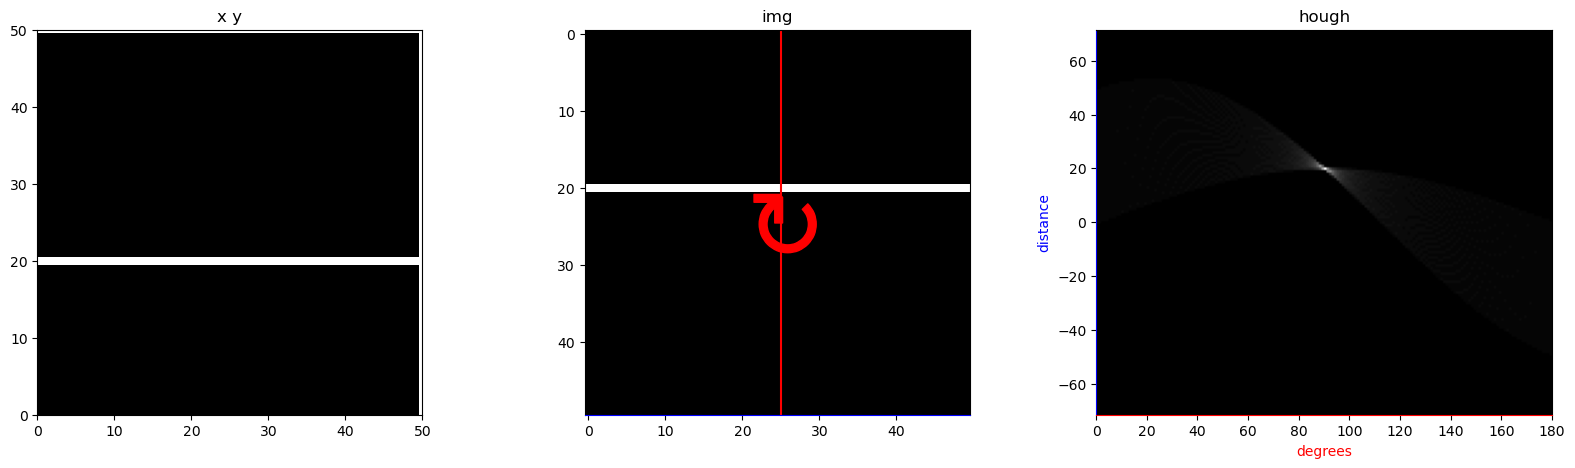

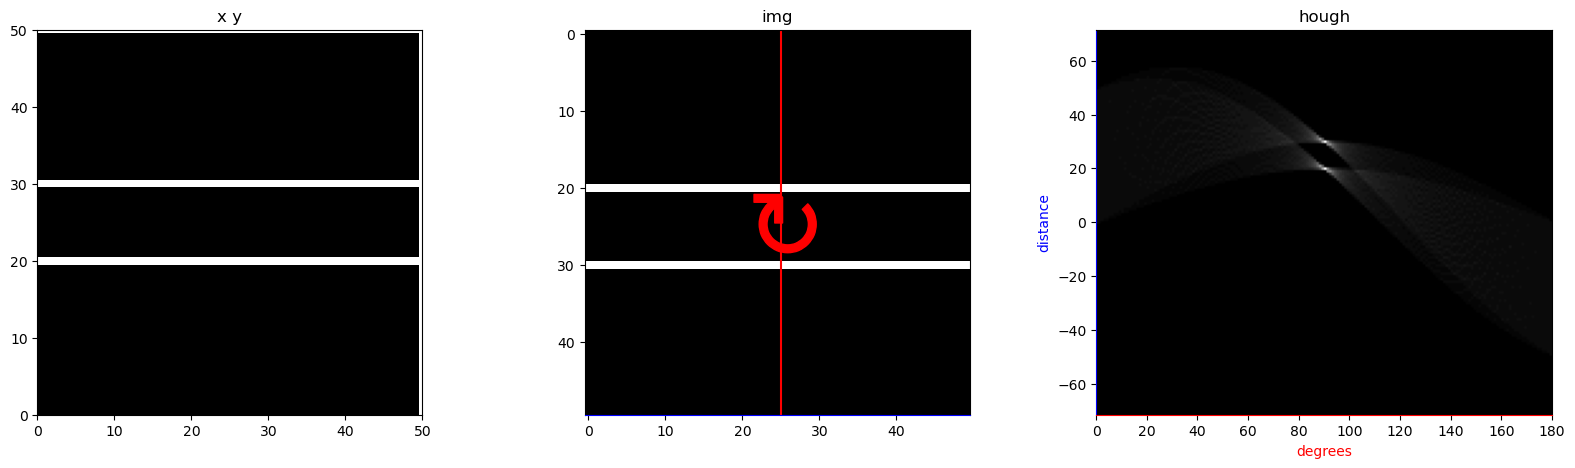

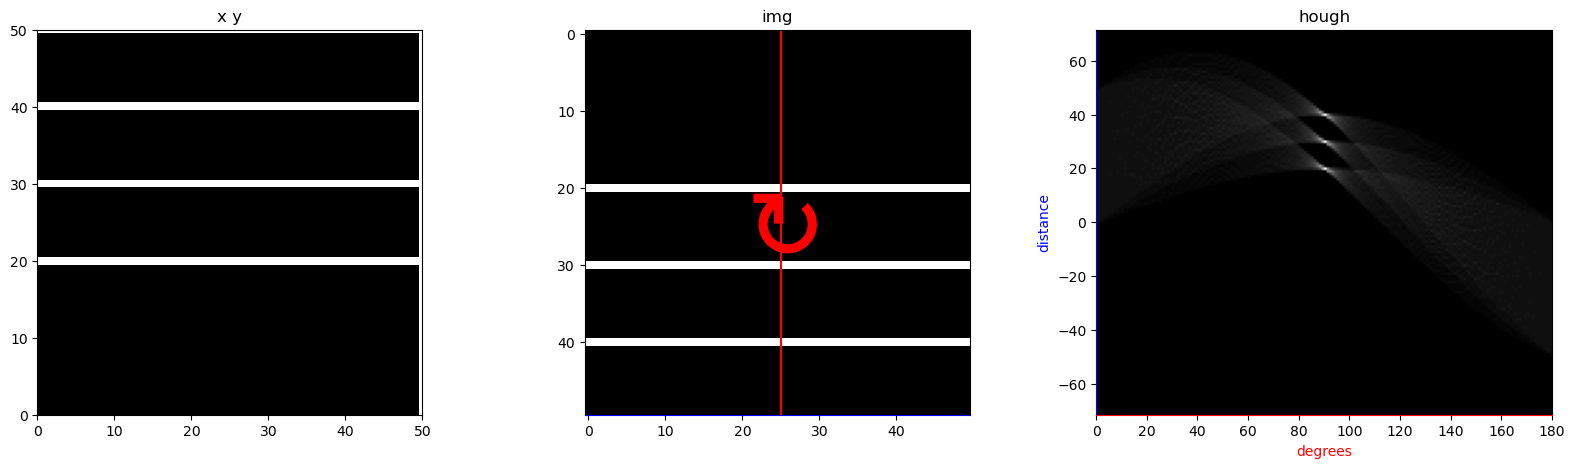

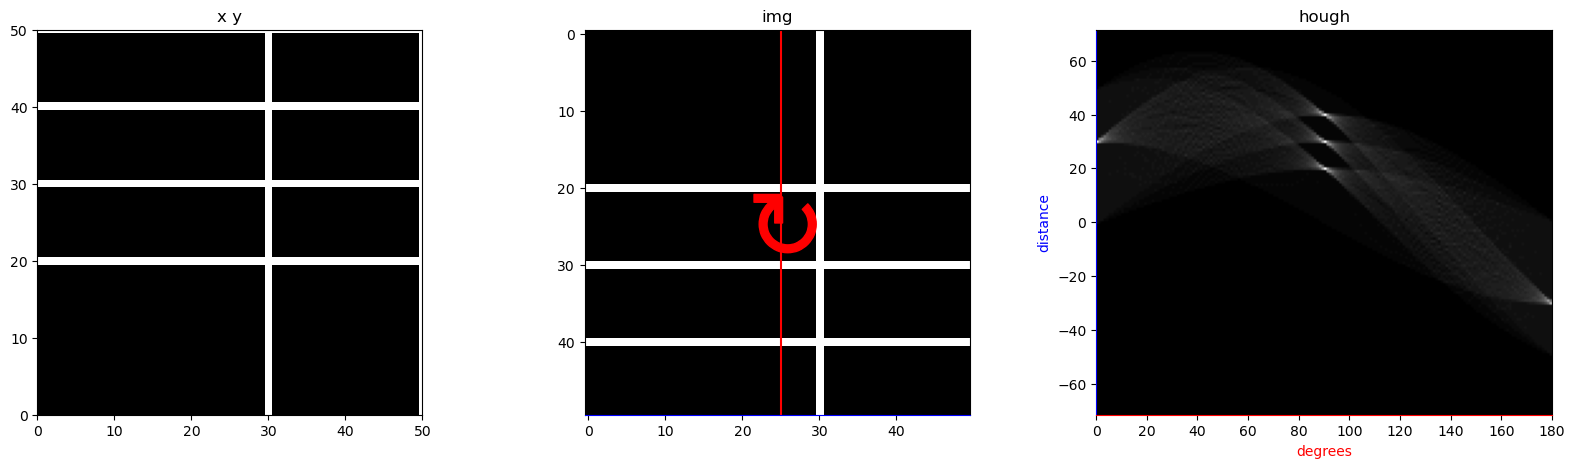

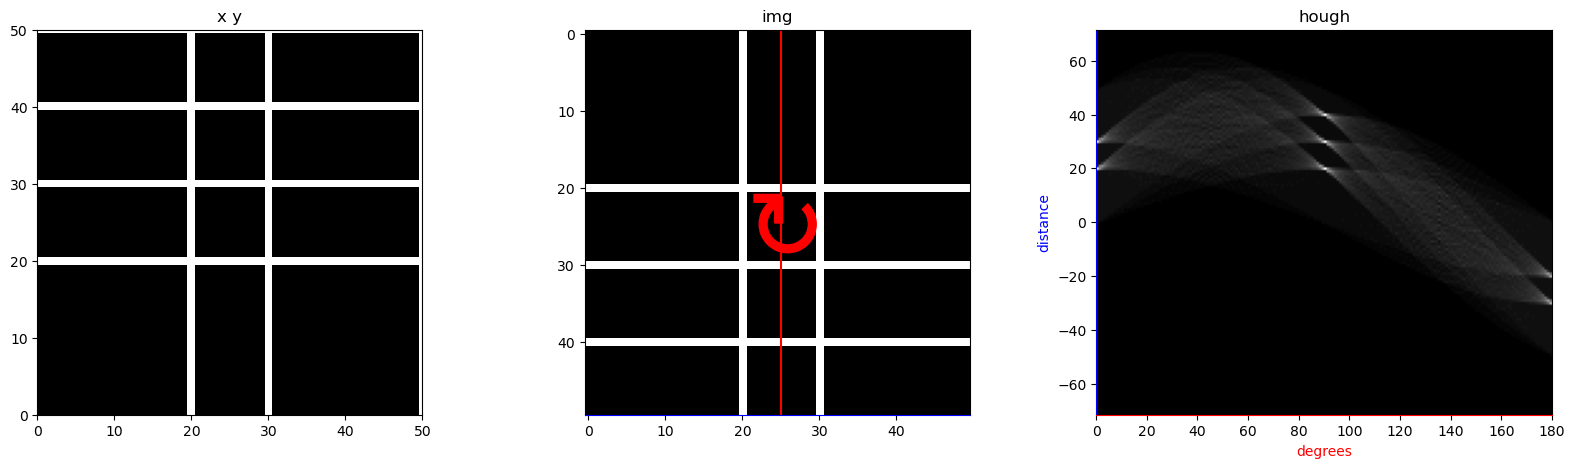

In [8]:
# image with empty
img = np.zeros((50, 50))

# image with one line
img[20] = 255
draw_hough(img)

# image with two lines
img[30] = 255
draw_hough(img)

# image with three lines
img[40] = 255
draw_hough(img)

# image with 4 lines
img[:, 30] = 255
draw_hough(img)

# image with 5 lines
img[:, 20] = 255
draw_hough(img)

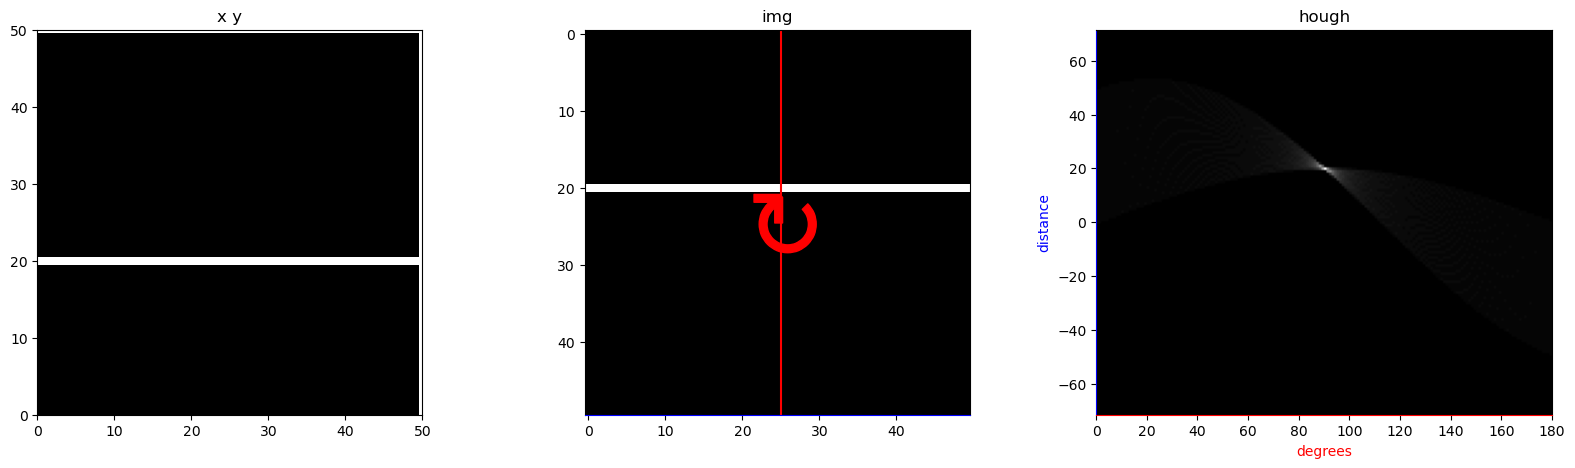

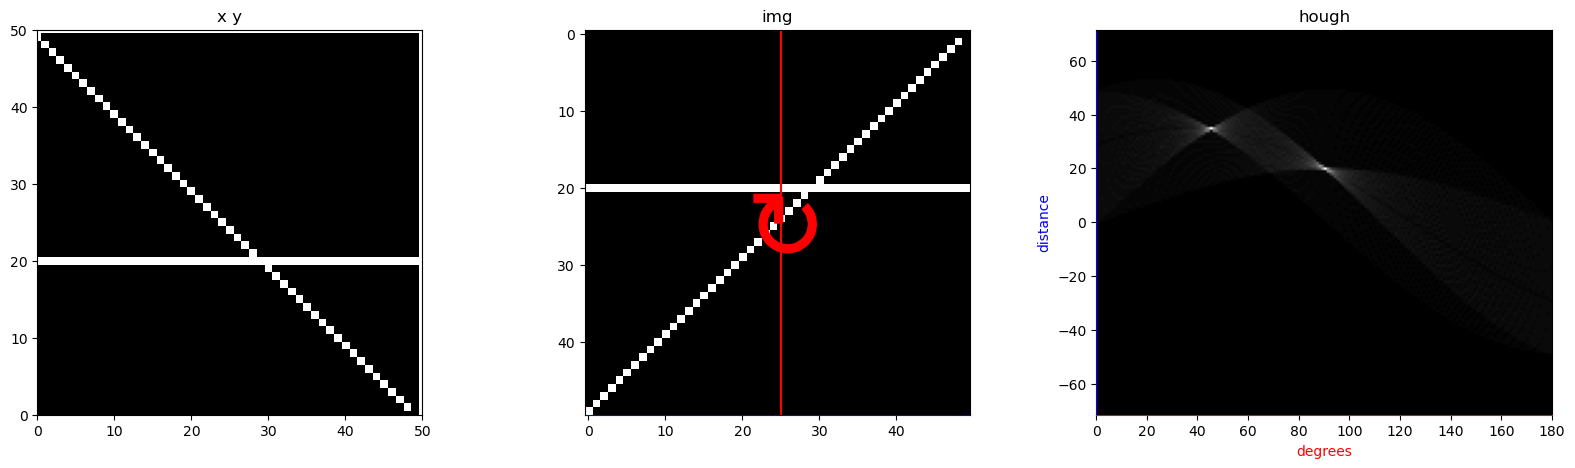

In [9]:
# image with empty
img = np.zeros((50, 50))

# image with one line
img[20] = 255
draw_hough(img)

# image with two lines
for i in range(49):
    x = i
    y = -x + 49
    img[y, x] = 255
draw_hough(img)